In [1]:
# Importing packages
from imblearn.over_sampling import SMOTE
from scipy.stats import norm
import pandas as pd # data processing
import numpy as np # working with arrays
from numpy import where
from numpy import mean
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import itertools # construct specialized tools
import matplotlib.pyplot as plt # visualizations
from matplotlib import rcParams # plot size customization
from termcolor import colored as cl # text customization
from sklearn.linear_model import LogisticRegression # model algorithm
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.metrics import jaccard_score as jss # evaluation metric
from sklearn.metrics import precision_score # evaluation metric
from sklearn.metrics import classification_report # evaluation metric
from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import log_loss # evaluation metric
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from collections import Counter

In [13]:
# Importing and cleaning the data
data = pd.read_csv('./data.csv')
data.head(50)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's occupation,Father's occupation,Displaced,Debtor,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),GDP,Target
0,1,8,5,2,1,1,6,10,1,0,...,0,0.000000,0,0,0,0,0.000000,0,1.74,0
1,1,6,1,11,1,1,4,4,1,0,...,6,14.000000,0,6,6,6,13.666667,0,0.79,2
2,1,1,5,5,1,1,10,10,1,0,...,0,0.000000,0,6,0,0,0.000000,0,1.74,0
3,1,8,2,15,1,1,6,4,1,0,...,6,13.428571,0,6,10,5,12.400000,0,-3.12,2
4,2,12,1,3,0,1,10,10,0,0,...,5,12.333333,0,6,6,6,13.000000,0,0.79,2
5,2,12,1,17,0,12,10,8,0,1,...,5,11.857143,0,5,17,5,11.500000,5,-0.92,2
6,1,1,1,12,1,1,8,11,1,0,...,7,13.300000,0,8,8,8,14.345000,0,-4.06,2
7,1,9,4,11,1,1,10,10,1,0,...,0,0.000000,0,5,5,0,0.000000,0,-4.06,0
8,1,1,3,10,1,1,10,10,0,0,...,6,13.875000,0,6,7,6,14.142857,0,-0.92,2
9,1,1,1,10,1,1,5,8,1,1,...,5,11.400000,0,6,14,2,13.500000,0,3.51,0


In [3]:
print(data.shape)
print(list(data.columns))

(4424, 27)
['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', "Mother's occupation", "Father's occupation", 'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'GDP', 'Target']


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 27 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Mother's occupation                             4424 non-null   int64  
 7   Father's occupation                             4424 non-null   int64  
 8   Displaced                                       4424 non-null   int64  
 9   Debtor                                   

In [14]:
X = data.drop('Target', axis=1)
y = data['Target']

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
logistic_model = LogisticRegression(random_state=0)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [9]:
y_pred = logistic_model.predict(X_test)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7762711864406779


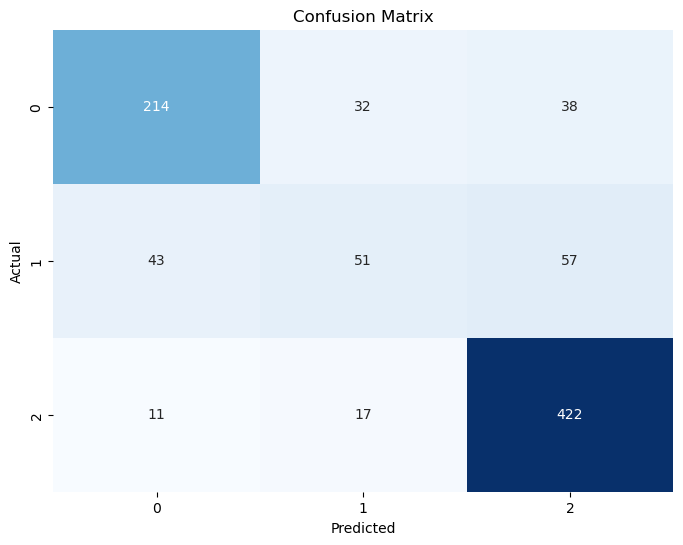

In [11]:
import seaborn as sns
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a Seaborn heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [12]:
# Generate a classification report
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.75      0.78       284
           1       0.51      0.34      0.41       151
           2       0.82      0.94      0.87       450

    accuracy                           0.78       885
   macro avg       0.71      0.68      0.68       885
weighted avg       0.76      0.78      0.76       885

